In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout
import untitled
from untitled import split_data

2021-11-05 13:31:08.607665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-05 13:31:08.607696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
train=split_data(subset="training", label_mode="categorical", labels="inferred")

Found 500 files belonging to 10 classes.
Using 400 files for training.


2021-11-05 13:31:09.949563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-05 13:31:09.949582: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-05 13:31:09.949598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mike-lenovo-laptop-2): /proc/driver/nvidia/version does not exist
2021-11-05 13:31:09.949826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
val_ds = split_data(subset="validation", label_mode="categorical", labels="inferred")

Found 500 files belonging to 10 classes.
Using 100 files for validation.


In [4]:
test=tf.keras.preprocessing.image_dataset_from_directory("val_ten_uk_birds/", labels="inferred", label_mode="categorical")

Found 100 files belonging to 10 classes.


In [5]:
type(train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

2021-11-05 13:31:10.101340: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-05 13:31:10.270959: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at strided_slice_op.cc:108 : Invalid argument: slice index 4 of dimension 0 out of bounds.


InvalidArgumentError: slice index 4 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

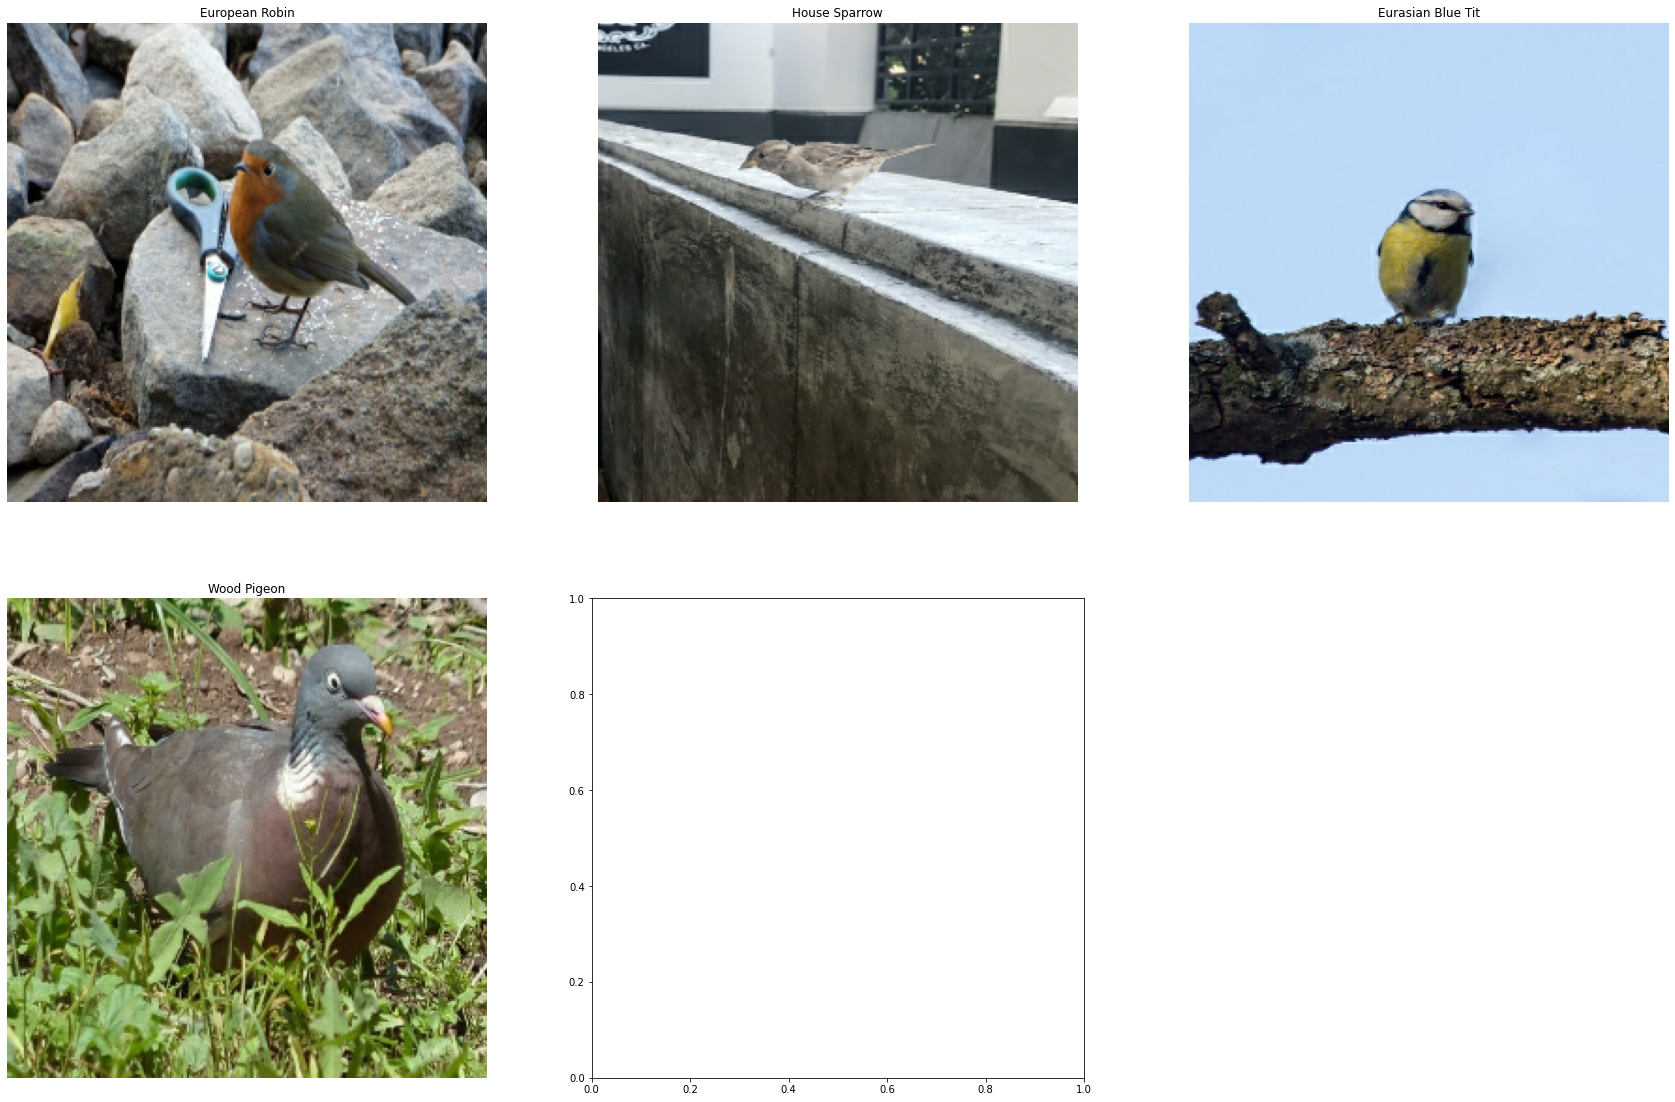

In [6]:
import bird_info
from bird_info import Bird_info
all_birds = Bird_info()
all_birds.visualise_images(data=train)

In [7]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

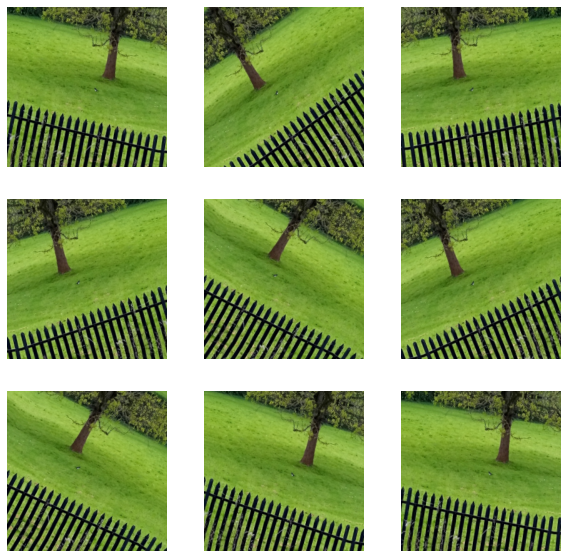

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
inputs = keras.Input(shape=(256,256,3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)

In [10]:
print(type(x))

<class 'keras.engine.keras_tensor.KerasTensor'>


In [11]:
image_size=(256,256)

In [12]:
def leNet_5_max_pool():
    model = keras.Sequential()
    
    

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding="valid", activation='relu', input_shape=(256,256,3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding="valid", activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

    model.add(layers.Flatten())
    
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(units=120, activation='relu'))

    model.add(layers.Dense(units=84, activation='relu'))

    model.add(layers.Dense(units=10, activation = 'softmax'))
    return model

In [13]:
def alexNet():
        #Instantiation
    AlexNet = keras.Sequential()
    
    AlexNet.add(layers.RandomFlip("horizontal"))
    AlexNet.add(layers.RandomRotation(0.1))

    #1st Convolutional Layer
    AlexNet.add(Conv2D(filters=96, input_shape=(256, 256,3), kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #2nd Convolutional Layer
    AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #3rd Convolutional Layer
    AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #4th Convolutional Layer
    AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #5th Convolutional Layer
    AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Passing it to a Fully Connected layer
    AlexNet.add(Flatten())
    # 1st Fully Connected Layer
    AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    AlexNet.add(Dropout(0.4))

    #2nd Fully Connected Layer
    AlexNet.add(Dense(4096))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4))

    #3rd Fully Connected Layer
    AlexNet.add(Dense(1000))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4))

    #Output Layer
    AlexNet.add(Dense(10))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('softmax'))
    
    return AlexNet

In [14]:
m=alexNet()


m.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy', tf.keras.metrics.Recall()])

In [ ]:
h=m.fit(train,epochs=5, verbose=1)

Epoch 1/5


2021-11-05 13:31:24.075075: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4294967296 exceeds 10% of free system memory.
2021-11-05 13:31:25.589701: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4294967296 exceeds 10% of free system memory.


In [ ]:
m.summary()

In [ ]:
h